In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [2]:
geoyyc = 'data/Community Boundaries.geojson' # This should be identical to the multipolygon field included in the census, but it saves me some hassle of transforming data for Folium's picky needs.
data = ['NAME', 'latitude', 'longitude',]
url = 'https://data.calgary.ca/resource/kzbm-mn66.csv?$select=' + ','.join(data) # 
df = pd.read_csv(url)
df.head(10)


,NAME,latitude,longitude
0,WALDEN,50.870404,-114.032588
1,12C,50.925093,-113.903433
2,HASKAYNE,51.116943,-114.286632
3,05G,51.136193,-113.916500
4,13M,50.856239,-114.042754
5,BELMONT,50.868746,-114.055280
6,SETON,50.873700,-113.947448
7,12L,50.914351,-113.871525
8,HOMESTEAD,51.121630,-113.916498
9,13L,50.874995,-114.054726


In [3]:
https://data.calgary.ca/api/views/9h2a-qxc4/files/5d115d24-c2e6-4ff0-97f0-5c17c9e67598?download=true&filename=Census_Metadata.csv

SyntaxError: invalid syntax (<ipython-input-3-37f1fe9faa06>, line 1)

In [4]:
neighborhoods = df.sort_values(by=['NAME'],axis=0)
communities = neighborhoods[neighborhoods['NAME'].map(len) > 3]
communities.reset_index(inplace=True, drop = True)
communities = communities.rename({'NAME':'Community'}, axis=1)
communities.head(10)

,Community,latitude,longitude
0,ABBEYDALE,51.059517,-113.927793
1,ACADIA,50.972407,-114.053702
2,ALBERT PARK/RADISSON HEIGHTS,51.044542,-113.996784
3,ALTADORE,51.015953,-114.101859
4,ALYTH/BONNYBROOK,51.027372,-114.030494
5,APPLEWOOD PARK,51.044983,-113.927864
6,ARBOUR LAKE,51.132624,-114.207593
7,ASPEN WOODS,51.045129,-114.207901
8,AUBURN BAY,50.892592,-113.958473
9,AURORA BUSINESS PARK,51.136256,-114.058476


In [5]:
communities.shape

(258, 3)

In [6]:
! pip install beautifulsoup4
! pip install lxml
! pip install html5lib

import requests
from bs4 import BeautifulSoup

source = requests.get('https://great-news.ca/demographics/').text


import urllib.request, urllib.parse, urllib.error
soup = BeautifulSoup(source, 'html5lib')
#soup = BeautifulSoup(source,'lxml')
datatable = soup.find_all('table')[0]
df = pd.read_html(str(datatable))

n_mhi = pd.DataFrame(df[0]) # n_mhi = neighborhood_median household income
n_mhi.head(10)

,Community,Newsletter Name,Median Household Income,Median Age,Population 2014,Dwellings 2014,City Quadrant,Median Home Sale Price
0,Abbeydale,-,"$55,345",34,6071,2031,SE,"$305,000"
1,Acadia,Acadia,"$46,089",42,10969,5067,SE,"$447,000"
2,Albert Park / Radisson Heights,-,"$38,019",37,6529,2936,SE,"$349,900"
3,Altadore,The Source,"$53,786",37,9518,4537,SW,"$925,000"
4,Applewood Park,-,"$65,724",33,6864,2228,SE,"$380,000"
5,Arbour Lake,Your Arbour Lake,"$70,590",41,10987,3931,NW,"$490,500"
6,Aspen Woods,The Gazette,"$133,939",32,7496,2657,SW,"$895,000"
7,Auburn Bay,Your Auburn Bay Mahogany,"$84,350",30,11127,4130,SE,"$519,900"
8,Banff Trail,Your Banff Trail Howler,"$49,996",31,4204,1952,NW,"$668,000"
9,Bankview,The View at Bankview,"$32,474",32,5416,3536,SW,"$610,000"


### Import median household income data, location coordinates and other information into a single dataframe

In [7]:
import urllib.request, urllib.parse, urllib.error
soup = BeautifulSoup(source,'lxml')
datatable = soup.find_all('table')[0]
df = pd.read_html(str(datatable))

n_mhi = pd.DataFrame(df[0]) # n_mhi = neighborhood_median household income
n_mhi.head(10)

,Community,Newsletter Name,Median Household Income,Median Age,Population 2014,Dwellings 2014,City Quadrant,Median Home Sale Price
0,Abbeydale,-,"$55,345",34,6071,2031,SE,"$305,000"
1,Acadia,Acadia,"$46,089",42,10969,5067,SE,"$447,000"
2,Albert Park / Radisson Heights,-,"$38,019",37,6529,2936,SE,"$349,900"
3,Altadore,The Source,"$53,786",37,9518,4537,SW,"$925,000"
4,Applewood Park,-,"$65,724",33,6864,2228,SE,"$380,000"
5,Arbour Lake,Your Arbour Lake,"$70,590",41,10987,3931,NW,"$490,500"
6,Aspen Woods,The Gazette,"$133,939",32,7496,2657,SW,"$895,000"
7,Auburn Bay,Your Auburn Bay Mahogany,"$84,350",30,11127,4130,SE,"$519,900"
8,Banff Trail,Your Banff Trail Howler,"$49,996",31,4204,1952,NW,"$668,000"
9,Bankview,The View at Bankview,"$32,474",32,5416,3536,SW,"$610,000"


In [8]:
n_mhi.shape

(180, 8)

In [9]:
n_mhi['Community'] = n_mhi['Community'].str.upper()
n_mhi.head(10)

,Community,Newsletter Name,Median Household Income,Median Age,Population 2014,Dwellings 2014,City Quadrant,Median Home Sale Price
0,ABBEYDALE,-,"$55,345",34,6071,2031,SE,"$305,000"
1,ACADIA,Acadia,"$46,089",42,10969,5067,SE,"$447,000"
2,ALBERT PARK / RADISSON HEIGHTS,-,"$38,019",37,6529,2936,SE,"$349,900"
3,ALTADORE,The Source,"$53,786",37,9518,4537,SW,"$925,000"
4,APPLEWOOD PARK,-,"$65,724",33,6864,2228,SE,"$380,000"
5,ARBOUR LAKE,Your Arbour Lake,"$70,590",41,10987,3931,NW,"$490,500"
6,ASPEN WOODS,The Gazette,"$133,939",32,7496,2657,SW,"$895,000"
7,AUBURN BAY,Your Auburn Bay Mahogany,"$84,350",30,11127,4130,SE,"$519,900"
8,BANFF TRAIL,Your Banff Trail Howler,"$49,996",31,4204,1952,NW,"$668,000"
9,BANKVIEW,The View at Bankview,"$32,474",32,5416,3536,SW,"$610,000"


In [10]:
source2 = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary#L').text
#soup2 = BeautifulSoup(source2,'lxml')
soup2 = BeautifulSoup(source2,'html5lib')
datatable2 = soup2.find_all('table')[0]
df2 = pd.read_html(str(datatable2))
n_density = pd.DataFrame(df2[0]) # n_mhi = neighborhood_median household income
n_density = n_density.rename({'Name[9]':'Community', 'Populationdensity':'Population Density'}, axis=1)
n_density = n_density[['Community','Population Density']]
n_density['Community'] = n_density['Community'].str.upper()
n_density.head(10)

,Community,Population Density
0,ABBEYDALE,3480.6
1,ACADIA,2744.9
2,ALBERT PARK/RADISSON HEIGHTS,2493.6
3,ALTADORE,3143.4
4,ALYTH/BONNYBROOK,4.2
5,APPLEWOOD PARK,4061.3
6,ARBOUR LAKE,2462.7
7,ASPEN WOODS,1387.1
8,AUBURN BAY,1598.4
9,AURORA BUSINESS PARK,0


### Cleanup data, merge tables

In [11]:
yyc1 = pd.merge(left=communities, right=n_mhi, left_on='Community', right_on='Community')
yyc = pd.merge(left=yyc1, right=n_density, left_on='Community', right_on='Community')
yyc.drop(['Newsletter Name','Population 2014', 'City Quadrant'], axis=1, inplace = True)
yyc.head(10)

,Community,latitude,longitude,Median Household Income,Median Age,Dwellings 2014,Median Home Sale Price,Population Density
0,ABBEYDALE,51.059517,-113.927793,"$55,345",34,2031,"$305,000",3480.6
1,ACADIA,50.972407,-114.053702,"$46,089",42,5067,"$447,000",2744.9
2,ALTADORE,51.015953,-114.101859,"$53,786",37,4537,"$925,000",3143.4
3,APPLEWOOD PARK,51.044983,-113.927864,"$65,724",33,2228,"$380,000",4061.3
4,ARBOUR LAKE,51.132624,-114.207593,"$70,590",41,3931,"$490,500",2462.7
5,ASPEN WOODS,51.045129,-114.207901,"$133,939",32,2657,"$895,000",1387.1
6,AUBURN BAY,50.892592,-113.958473,"$84,350",30,4130,"$519,900",1598.4
7,BANFF TRAIL,51.074219,-114.115121,"$49,996",31,1952,"$668,000",2558
8,BANKVIEW,51.034133,-114.100947,"$32,474",32,3536,"$610,000",7458.6
9,BAYVIEW,50.974636,-114.113971,"$184,383",49,248,"$1,125,000",1705


In [12]:
yyc['Median Household Income'].apply(type).value_counts()

<class 'str'>    174
Name: Median Household Income, dtype: int64

In [13]:

yyc['Population Density'] = yyc['Population Density'].astype(float)
yyc['Median Home Sale Price'] = yyc['Median Home Sale Price'].replace({'\$': '', ',':''}, regex=True)
yyc['Median Home Sale Price'] = yyc['Median Home Sale Price'].str.replace(',', '')
yyc['Median Home Sale Price'] = yyc['Median Home Sale Price'].astype(int)

yyc['Median Household Income'] = yyc['Median Household Income'].replace({'\$': '', ',':''}, regex=True)
yyc['Median Household Income'] = yyc['Median Household Income'].str.replace(',', '')
yyc['Median Household Income'] = yyc['Median Household Income'].astype(int)

yyc.head(10)

,Community,latitude,longitude,Median Household Income,Median Age,Dwellings 2014,Median Home Sale Price,Population Density
0,ABBEYDALE,51.059517,-113.927793,55345,34,2031,305000,3480.6
1,ACADIA,50.972407,-114.053702,46089,42,5067,447000,2744.9
2,ALTADORE,51.015953,-114.101859,53786,37,4537,925000,3143.4
3,APPLEWOOD PARK,51.044983,-113.927864,65724,33,2228,380000,4061.3
4,ARBOUR LAKE,51.132624,-114.207593,70590,41,3931,490500,2462.7
5,ASPEN WOODS,51.045129,-114.207901,133939,32,2657,895000,1387.1
6,AUBURN BAY,50.892592,-113.958473,84350,30,4130,519900,1598.4
7,BANFF TRAIL,51.074219,-114.115121,49996,31,1952,668000,2558.0
8,BANKVIEW,51.034133,-114.100947,32474,32,3536,610000,7458.6
9,BAYVIEW,50.974636,-114.113971,184383,49,248,1125000,1705.0


In [14]:
yyc.dtypes
print(yyc.shape)

(174, 8)


### Foursquare data

In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
categoryid = '4d4b7105d754a06374d81259' #food
LIMIT = 200

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryid={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius,
            LIMIT,
            categoryid)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community', 
                  'Community Latitude', 
                  'Community Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
yyc_venues = getNearbyVenues(names=yyc['Community'],
                                   latitudes=yyc['latitude'],
                                   longitudes=yyc['longitude']
                                  )

ABBEYDALE
ACADIA
ALTADORE
APPLEWOOD PARK
ARBOUR LAKE
ASPEN WOODS
AUBURN BAY
BANFF TRAIL
BANKVIEW
BAYVIEW
BEDDINGTON HEIGHTS
BEL-AIRE
BELTLINE
BONAVISTA DOWNS
BOWNESS
BRAESIDE
BRENTWOOD
BRIDGELAND/RIVERSIDE
BRIDLEWOOD
BRITANNIA
CAMBRIAN HEIGHTS
CANYON MEADOWS
CAPITOL HILL
CASTLERIDGE
CEDARBRAE
CHAPARRAL
CHARLESWOOD
CHINOOK PARK
CHRISTIE PARK
CITADEL
CLIFF BUNGALOW
COACH HILL
COLLINGWOOD
COPPERFIELD
CORAL SPRINGS
COUGAR RIDGE
COUNTRY HILLS
COUNTRY HILLS VILLAGE
COVENTRY HILLS
CRANSTON
CRESCENT HEIGHTS
CRESTMONT
DALHOUSIE
DEER RIDGE
DEER RUN
DIAMOND COVE
DISCOVERY RIDGE
DOVER
EAGLE RIDGE
EAU CLAIRE
EDGEMONT
ELBOW PARK
ELBOYA
ERIN WOODS
ERLTON
EVANSTON
EVERGREEN
FAIRVIEW
FALCONRIDGE
FOREST HEIGHTS
FOREST LAWN
GLAMORGAN
GLENBROOK
GLENDALE
GREENVIEW
HAMPTONS
HARVEST HILLS
HAWKWOOD
HAYSBORO
HIDDEN VALLEY
HIGHLAND PARK
HIGHWOOD
HILLHURST
HOUNSFIELD HEIGHTS/BRIAR HILL
HUNTINGTON HILLS
INGLEWOOD
KELVIN GROVE
KILLARNEY/GLENGARRY
KINCORA
KINGSLAND
LAKE BONAVISTA
LAKEVIEW
LEGACY
LINCOLN PARK
LOWER 

In [18]:
print(yyc_venues.shape)
yyc_venue_data = yyc_venues.copy()
yyc_venues

(3572, 7)


,Community,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ABBEYDALE,51.059517,-113.927793,Subway,51.059239,-113.934423,Sandwich Place
1,ABBEYDALE,51.059517,-113.927793,Mac's,51.059376,-113.934425,Convenience Store
2,ABBEYDALE,51.059517,-113.927793,Barrio Fiesta,51.052695,-113.935544,Filipino Restaurant
3,ABBEYDALE,51.059517,-113.927793,Mely's Bakery and Café,51.052672,-113.936031,Café
4,ACADIA,50.972407,-114.053702,Acadia Aquatic & Fitness Centre,50.973297,-114.059984,Gym / Fitness Center
5,ACADIA,50.972407,-114.053702,Best Buy,50.978540,-114.043642,Electronics Store
6,ACADIA,50.972407,-114.053702,Starlite Restaurant & Bar,50.978660,-114.061497,American Restaurant
7,ACADIA,50.972407,-114.053702,Shoppers Drug Mart,50.978545,-114.060691,Pharmacy
8,ACADIA,50.972407,-114.053702,Michaels,50.978076,-114.043602,Arts & Crafts Store
9,ACADIA,50.972407,-114.053702,Acadia Recreational Center,50.972256,-114.065077,Recreation Center


In [19]:
yyc_venues.describe(include='all')

,Community,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
count,3572,3572.000000,3572.000000,3572,3572.000000,3572.000000,3572
unique,174,NaN,NaN,1632,NaN,NaN,256
top,LOWER MOUNT ROYAL,NaN,NaN,Tim Hortons,NaN,NaN,Coffee Shop
freq,100,NaN,NaN,91,NaN,NaN,262
mean,NaN,51.035698,-114.080226,NaN,51.035830,-114.079833,NaN
std,NaN,0.061032,0.057806,NaN,0.060782,0.057437,NaN
min,NaN,50.857617,-114.260486,NaN,50.858113,-114.267232,NaN
25%,NaN,51.005040,-114.107154,NaN,51.008041,-114.108339,NaN
50%,NaN,51.037271,-114.078200,NaN,51.038772,-114.074245,NaN
75%,NaN,51.062712,-114.057466,NaN,51.066206,-114.060687,NaN


In [20]:
yyc_venue_count = yyc_venues.groupby('Community').count()
yyc_venue_count = yyc_venue_count.drop(['Community Latitude','Community Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1)
yyc_venue_count = yyc_venue_count.rename({'Venue':'Venue Count'}, axis=1)
yyc_venue_count.sort_values(by='Venue Count', ascending=False)

,Venue Count
Community,
LOWER MOUNT ROYAL,100
CLIFF BUNGALOW,99
SUNNYSIDE,96
BELTLINE,81
EAU CLAIRE,80
CRESCENT HEIGHTS,79
MEADOWLARK PARK,79
UPPER MOUNT ROYAL,78
RAMSAY,64


In [21]:
yyc = yyc.merge(yyc_venue_count, on='Community', how='left')

In [22]:
yyc['Venue Count']= yyc['Venue Count'].fillna(0)
yyc

,Community,latitude,longitude,Median Household Income,Median Age,Dwellings 2014,Median Home Sale Price,Population Density,Venue Count
0,ABBEYDALE,51.059517,-113.927793,55345,34,2031,305000,3480.6,4
1,ACADIA,50.972407,-114.053702,46089,42,5067,447000,2744.9,14
2,ALTADORE,51.015953,-114.101859,53786,37,4537,925000,3143.4,15
3,APPLEWOOD PARK,51.044983,-113.927864,65724,33,2228,380000,4061.3,6
4,ARBOUR LAKE,51.132624,-114.207593,70590,41,3931,490500,2462.7,40
5,ASPEN WOODS,51.045129,-114.207901,133939,32,2657,895000,1387.1,20
6,AUBURN BAY,50.892592,-113.958473,84350,30,4130,519900,1598.4,4
7,BANFF TRAIL,51.074219,-114.115121,49996,31,1952,668000,2558.0,29
8,BANKVIEW,51.034133,-114.100947,32474,32,3536,610000,7458.6,30
9,BAYVIEW,50.974636,-114.113971,184383,49,248,1125000,1705.0,7


In [23]:
yyc.describe()

,latitude,longitude,Median Household Income,Median Age,Dwellings 2014,Median Home Sale Price,Population Density,Venue Count
count,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000,174.000000
mean,51.034690,-114.081681,69529.178161,38.896552,2585.954023,5.976602e+05,2670.237931,20.528736
std,0.074565,0.075531,26484.943723,5.823084,1853.100881,2.283349e+05,1340.209527,19.757980
min,50.857617,-114.260486,30411.000000,29.000000,110.000000,3.050000e+05,0.000000,2.000000
25%,50.985098,-114.129630,51258.250000,34.250000,1153.750000,4.402500e+05,1957.075000,7.250000
50%,51.041900,-114.085021,64164.000000,38.000000,2402.000000,5.480000e+05,2544.850000,15.000000
75%,51.084942,-114.036100,81422.500000,42.000000,3516.500000,6.876250e+05,3238.400000,26.750000
max,51.175690,-113.924528,184383.000000,58.000000,15243.000000,1.701000e+06,10600.000000,100.000000


In [24]:
yyc_corr=yyc.corr()
yyc_corr

,latitude,longitude,Median Household Income,Median Age,Dwellings 2014,Median Home Sale Price,Population Density,Venue Count
latitude,1.000000,-0.279264,-0.119178,-0.127787,0.073463,-0.039308,0.153697,0.014129
longitude,-0.279264,1.000000,-0.210780,-0.180988,0.049585,-0.344768,0.117837,0.020137
Median Household Income,-0.119178,-0.210780,1.000000,0.346630,-0.151207,0.472443,-0.341346,-0.263996
Median Age,-0.127787,-0.180988,0.346630,1.000000,-0.370668,0.374503,-0.283941,-0.047351
Dwellings 2014,0.073463,0.049585,-0.151207,-0.370668,1.000000,-0.335456,0.364850,0.043044
Median Home Sale Price,-0.039308,-0.344768,0.472443,0.374503,-0.335456,1.000000,-0.184483,0.191284
Population Density,0.153697,0.117837,-0.341346,-0.283941,0.364850,-0.184483,1.000000,0.373403
Venue Count,0.014129,0.020137,-0.263996,-0.047351,0.043044,0.191284,0.373403,1.000000


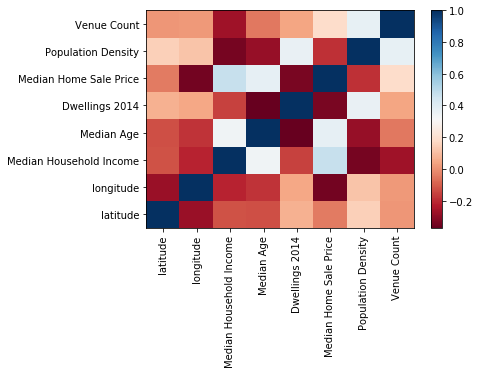

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(yyc_corr, cmap='RdBu')

#label names
row_labels = yyc_corr.columns
col_labels = yyc_corr.index

#move ticks and labels to the center
ax.set_xticks(np.arange(yyc_corr.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(yyc_corr.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [26]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(yyc['Population Density'], yyc['Venue Count'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value, " For Population Density vs. Venue Count")  

The Pearson Correlation Coefficient is 0.37340262859372164  with a P-value of P = 3.879332792506211e-07  For Population Density vs. Venue Count


In [27]:
pearson_coef, p_value = stats.pearsonr(yyc['Median Household Income'], yyc['Venue Count'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value, " For Median Household Income vs. Venue Count")  

The Pearson Correlation Coefficient is -0.2639956859426974  with a P-value of P = 0.0004317148644524797  For Median Household Income vs. Venue Count


In [28]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(yyc['Population Density'], yyc['Median Household Income'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value, " For Population Density vs. Median Household Income")  

The Pearson Correlation Coefficient is -0.34134631124413956  with a P-value of P = 4.0379181976788e-06  For Population Density vs. Median Household Income


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [30]:
yyc['Population Density'] = yyc['Population Density'].astype(int) 
yyc['Venue Count'] = yyc['Venue Count'].astype(int)
yyc.dtypes

Community                   object
latitude                   float64
longitude                  float64
Median Household Income      int64
Median Age                   int64
Dwellings 2014               int64
Median Home Sale Price       int64
Population Density           int64
Venue Count                  int64
dtype: object

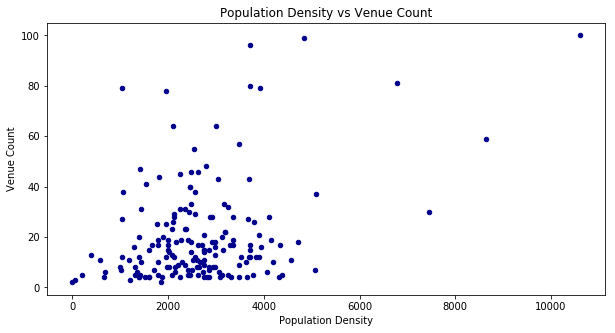

In [31]:

yyc.plot(kind='scatter', x= 'Population Density', y= 'Venue Count', figsize=(10, 5), color='darkblue')

plt.title('Population Density vs Venue Count')
plt.xlabel('Population Density')
plt.ylabel('Venue Count')

plt.show()

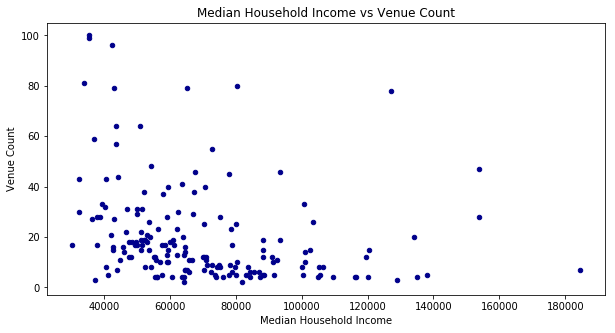

In [32]:
yyc.plot(kind='scatter', x= 'Median Household Income', y= 'Venue Count', figsize=(10, 5), color='darkblue')

plt.title('Median Household Income vs Venue Count')
plt.xlabel('Median Household Income')
plt.ylabel('Venue Count')

plt.show()

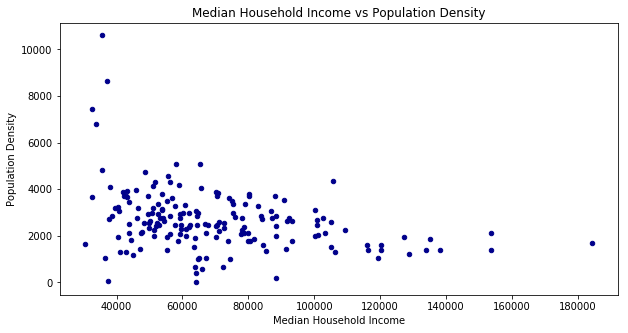

In [33]:
yyc.plot(kind='scatter', x= 'Median Household Income', y= 'Population Density', figsize=(10, 5), color='darkblue')

plt.title('Median Household Income vs Population Density')
plt.xlabel('Median Household Income')
plt.ylabel('Population Density')

plt.show()

In [34]:

yyc_norm_pop = (yyc['Population Density']-yyc['Population Density'].min())/(yyc['Population Density'].max()-yyc['Population Density'].min())
yyc_norm_medianincome = (yyc['Median Household Income']-yyc['Median Household Income'].min())/(yyc['Median Household Income'].max()-yyc['Median Household Income'].min())
yyc_norm_venuecount = (yyc['Venue Count']-yyc['Venue Count'].min())/(yyc['Venue Count'].max()-yyc['Venue Count'].min())


In [35]:
import folium
import requests


yyc_map_commpop = folium.Map(location=[51.049999, -114.066666], zoom_start=11, width = '50%', height='90%')
# instantiate a feature group for communities
communities = folium.map.FeatureGroup()

# loop through and add makers to map
for i in range(0,len(yyc)):
   folium.Circle(
      location=[yyc.iloc[i]['latitude'], yyc.iloc[i]['longitude']],
      popup=yyc.iloc[i]['Community'],
      radius=yyc_norm_pop.iloc[i]*1000,
      color='crimson',
      fill=True,
      fill_color='blue'
   ).add_to(yyc_map_commpop)

yyc_map_commpop

In [36]:

yyc_map_commincome = folium.Map(location=[51.049999, -114.066666], zoom_start=11, width = '50%', height='90%')
# instantiate a feature group for communities
communities = folium.map.FeatureGroup()

# loop through and add makers to map
for i in range(0,len(yyc)):
   folium.Circle(
      location=[yyc.iloc[i]['latitude'], yyc.iloc[i]['longitude']],
      popup=yyc.iloc[i]['Community'],
      radius=yyc_norm_medianincome.iloc[i]*1000,
      color='blue',
      fill=True,
      fill_color='green'
   ).add_to(yyc_map_commincome)

yyc_map_commincome

In [37]:
yyc_map_venue = folium.Map(location=[51.049999, -114.066666], zoom_start=11, width = '50%', height='90%')
# instantiate a feature group for communities
communities = folium.map.FeatureGroup()

# loop through and add makers to map
for i in range(0,len(yyc)):
   folium.Circle(
      location=[yyc.iloc[i]['latitude'], yyc.iloc[i]['longitude']],
      popup=yyc.iloc[i]['Community'],
      radius=yyc_norm_venuecount.iloc[i]*1000,
      color='green',
      fill=True,
      fill_color='yellow'
   ).add_to(yyc_map_venue)

yyc_map_venue

In [38]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = yyc[['Population Density','Median Household Income','Venue Count']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=2).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
yyc["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
yyc[["Community","Median Household Income","Population Density",'Venue Count',"Clus_Db"]]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Community,Median Household Income,Population Density,Venue Count,Clus_Db
0,ABBEYDALE,55345,3480,4,0
1,ACADIA,46089,2744,14,1
2,ALTADORE,53786,3143,15,1
3,APPLEWOOD PARK,65724,4061,6,-1
4,ARBOUR LAKE,70590,2462,40,-1
5,ASPEN WOODS,133939,1387,20,-1
6,AUBURN BAY,84350,1598,4,2
7,BANFF TRAIL,49996,2558,29,3
8,BANKVIEW,32474,7458,30,-1
9,BAYVIEW,184383,1705,7,-1


NameError: name 'yyc_mean' is not defined

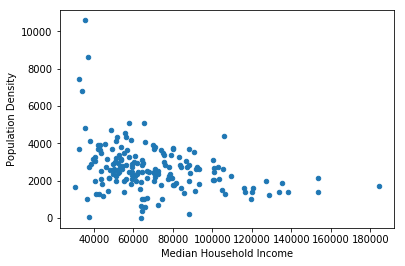

In [39]:
ax = yyc.plot(kind='scatter',x='Median Household Income',y='Population Density')
yyc_mean[['Median Household Income','Population Density','Clus_Db']].apply(lambda row: ax.text(*row),axis=1);


plt.title('Median Household Income vs Population Density')
plt.xlabel('Median Household Income')
plt.ylabel('Population Density')

NameError: name 'yyc_mean' is not defined

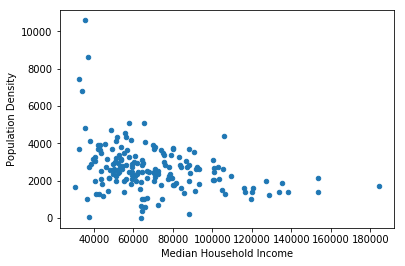

In [40]:
ax = yyc.plot(kind='scatter',x='Median Household Income',y='Population Density')
yyc_mean[['Median Household Income','Population Density','Clus_Db']].apply(lambda row: ax.text(*row),axis=1);


plt.title('Median Household Income vs Population Density')
plt.xlabel('Median Household Income')
plt.ylabel('Population Density')

In [42]:
yyc.groupby('Clus_Db').count()

,Community,latitude,longitude,Median Household Income,Median Age,Dwellings 2014,Median Home Sale Price,Population Density,Venue Count
Clus_Db,,,,,,,,,
-1,75,75,75,75,75,75,75,75,75
0,4,4,4,4,4,4,4,4,4
1,38,38,38,38,38,38,38,38,38
2,8,8,8,8,8,8,8,8,8
3,3,3,3,3,3,3,3,3,3
4,6,6,6,6,6,6,6,6,6
5,2,2,2,2,2,2,2,2,2
6,3,3,3,3,3,3,3,3,3
7,10,10,10,10,10,10,10,10,10


In [41]:
yyc_mean=yyc.groupby('Clus_Db').mean()
yyc_mean.drop(['latitude', 'longitude', 'Median Age', 'Dwellings 2014', 'Median Home Sale Price'], axis=1, inplace=True)
yyc_mean

,Median Household Income,Population Density,Venue Count
Clus_Db,,,
-1,71022.066667,2803.346667,30.800000
0,61210.500000,3184.250000,4.750000
1,57333.157895,2576.184211,14.684211
2,80257.750000,1838.875000,5.750000
3,50453.000000,2386.666667,30.333333
4,73429.166667,3718.500000,9.000000
5,90405.000000,2800.000000,13.000000
6,102903.666667,2673.000000,11.000000
7,83496.300000,2824.200000,6.000000


KeyError: "['Clus_Db'] not in index"

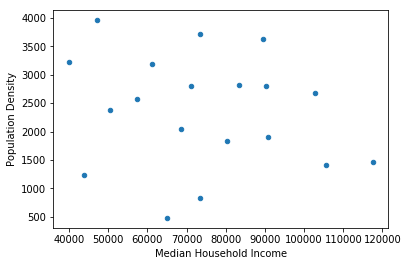

In [43]:

ax = yyc_mean.plot(kind='scatter',x='Median Household Income',y='Population Density')
yyc_mean[['Median Household Income','Population Density','Clus_Db']].apply(lambda row: ax.text(*row),axis=1);


plt.title('Median Household Income vs Population Density')
plt.xlabel('Median Household Income')
plt.ylabel('Population Density')


In [44]:
yyc.sort_values(by='Clus_Db', ascending=False)


,Community,latitude,longitude,Median Household Income,Median Age,Dwellings 2014,Median Home Sale Price,Population Density,Venue Count,Clus_Db
160,VALLEY RIDGE,51.095367,-114.251163,104947,41,1904,630000,1519,4,17
137,SHAWNEE SLOPES,50.926191,-114.085813,106379,52,866,650000,1304,8,17
163,WALDEN,50.870404,-114.032588,64194,29,951,442000,389,13,16
132,SAGE HILL,51.175690,-114.140762,65835,30,1603,500000,576,11,16
115,PUMP HILL,50.966833,-114.100801,93360,57,562,900000,1793,19,15
165,WEST SPRINGS,51.059732,-114.206168,88328,35,3000,710000,2006,19,15
109,PANORAMA HILLS,51.159713,-114.088066,90859,32,8063,529000,3531,12,14
145,SOMERSET,50.898708,-114.081313,88150,37,3144,440000,3713,12,14
147,SOUTHVIEW,51.034156,-113.997338,44908,43,926,398000,1187,11,13
100,MONTGOMERY,51.071099,-114.162261,42795,40,1893,520000,1286,16,13


In [ ]:
yyc.describe()

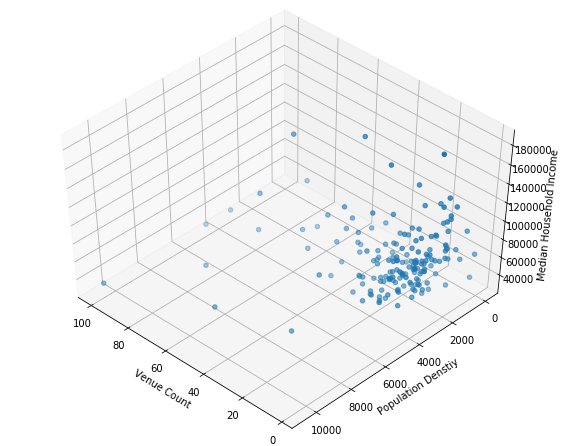

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_xlabel('Venue Count')
ax.set_ylabel('Population Denstiy')
ax.set_zlabel('Median Household Income')
ax.scatter(yyc['Venue Count'], yyc['Population Density'], yyc['Median Household Income'], zdir='z', s=20, c=None, depthshade=True)



In [46]:
from sklearn.cluster import KMeans 
yyc_clust= yyc.copy()
yyc_clust.drop(['Community', 'Median Age', 'latitude','longitude', 'Dwellings 2014', 'Median Home Sale Price'], axis=1, inplace = True)
X = yyc_clust.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)


k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means.fit(X)

labels = k_means.labels_

yyc_clust["Clus_km"] = labels
yyc_clust

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Median Household Income,Population Density,Venue Count,Clus_Db,Clus_km
0,55345,3480,4,0,1
1,46089,2744,14,1,4
2,53786,3143,15,1,4
3,65724,4061,6,-1,1
4,70590,2462,40,-1,2
5,133939,1387,20,-1,0
6,84350,1598,4,2,0
7,49996,2558,29,3,4
8,32474,7458,30,-1,3
9,184383,1705,7,-1,2


In [47]:
yyc_clust.groupby('Clus_km').mean()

,Median Household Income,Population Density,Venue Count,Clus_Db
Clus_km,,,,
0,83684.531250,1107.687500,14.531250,4.000000
1,58816.545455,3988.484848,25.151515,2.848485
2,73846.555556,2144.611111,19.944444,1.259259
3,34746.250000,8373.500000,67.500000,-1.000000
4,65735.823529,2905.588235,18.235294,2.411765


In [48]:
yyc = yyc.merge(yyc_clust, how='left')

In [ ]:
yyc_clust.describe()